
# Lecture 03. CNN Basic

### Contents :

   1. Lecture 03 Overview <br>
      1.1. Importing the MNIST Dataset <br>
      1.2. Importing libraries <br>

   2. Preprocessing the training dataset <br>

   3. Building and compiling the model<br>

   4. Training the model <br>

   5. Testing the model <br>


  

# 1. Lecture 03 Overview

This lecture aims to explore the basics of CNN.<br>
The intended learning outcomes are:<br>
*   Importing and preprocessing datasets
*   Building, training and testing a simple model

## 1.1 Importing the MNIST Dataset

In [1]:
%%time
!pip3 install mnist

CPU times: user 331 ms, sys: 30.9 ms, total: 362 ms
Wall time: 27.6 s


## 1.2 Importing libraries

In [2]:
%%time

import matplotlib.pyplot as plt
import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

CPU times: user 1.99 s, sys: 109 ms, total: 2.1 s
Wall time: 2.38 s


# 2. Preprocessing the training dataset


(60000, 28, 28, 1)
(60000,)


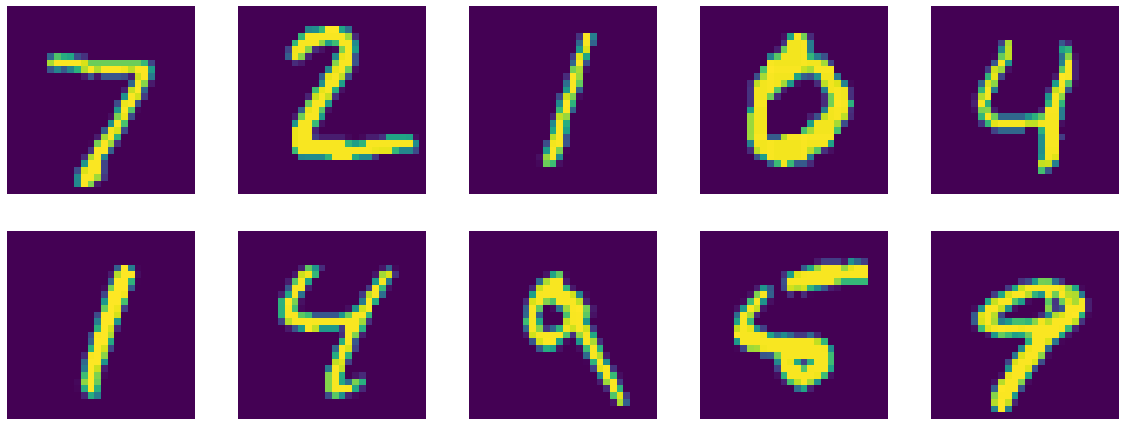

In [3]:
# %%time

# Loading the dataset
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# plt.figure (figsize = (integer_x, integer_y)) sets the size of the figure which displays the image
plt.figure(figsize=(20,20))
# Printing the entire data set is inefficient. Select a few samples (~10) and plot
for idx in range(10):
    # ax = plt.subplot (number_of_rows, number_of_columns, index) creates subplots for the figure
    ax = plt.subplot(5,5,idx+1)
    # plt.imshow() prints the image to the designated subplot
    plt.imshow(test_images[idx])
    # When viewing image data, the axes are unnecessary. However the default option displays the axes. Therefore, disable it.
    plt.axis('off')

# To train the model, we need to preprocess the data (Normalization in the example below). Since the pixel intensity value must be between 0 and 1, divide all values by 255 and set as ___.astype('float32')
train_images = (train_images / 255) 
test_images = (test_images / 255) 

# The Keras model is optimized to make predictions in batches of samples at a time. Even when using a single image, you need to create a two-dimensional array using np.expand_dims(___)
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

# Check the number of columns and rows of data (shape) using ___.shape
print(train_images.shape) # (60000, 28, 28, 1)
print(train_labels.shape) # (60000,)



# 3. Building and compiling the model

In [4]:
%%time

# Models can be built using the structure below
model = Sequential(name="Simple-CNN")

# The following Conv2D (Convolution) layer is set to: 8 filters, 3x3 kernel size with ReLU as its activation function.
model.add(Conv2D(filters=8, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
# Maxpooling is an operation to reduce the complex structure by passing only the largest value among the results derived from the convolution layer to the next layer and discarding the rest.
# Downsample the input expression using the maximum value in the window defined as pool_size for each dimension along the feature axis.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

# Convert the image format from a two-dimensional array to a one-dimensional array that can be interpreted by the model.
model.add(Flatten())
# The following Dense layer contains 64 neurons with the activation function set to sigmoid.
model.add(Dense(64, activation='sigmoid'))
# The following Dense layer contains 10 neurons with the activation function set to softmax.
model.add(Dense(10, activation='softmax'))


# Before training the model, it must be compiled using model.compile(optimizer='', loss='', metrics=[''])
# Optimizer — How the model is updated based on the data displayed and the loss function
# Loss Function — Measures how accurate the model is during training. Try to "tune" the model in the right direction by minimizing this feature
# Metrics — Used to monitor training and testing steps. For example, you can use accuracy that is part of a correctly classified image.

# The model can be compiled using the following code
model.compile(
    optimizer= 'adam',
    # Categorical crossentropy is a loss function mainly used in multiple classification problems.
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


model.summary()

Model: "Simple-CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

# 4. Training the model

In [ ]:
%%time

# Training the model
model.fit(
    train_images,
    # Convert the label into categorical data
    to_categorical(train_labels),
    # Train using the data 10 times.
    epochs=10,
    # We pass some validation for monitoring validation loss and metrics at the end of each epoch
    validation_data=(test_images, to_categorical(test_labels))
)

model.save_weights('cnn.h5')
#model.load_weights('cnn.h5')


Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2857 - accuracy: 0.9216 - val_loss: 0.0888 - val_accuracy: 0.9732
Epoch 2/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0787 - accuracy: 0.9771 - val_loss: 0.0585 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0526 - accuracy: 0.9845 - val_loss: 0.0563 - val_accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0407 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0334 - accuracy: 0.9900 - val_loss: 0.0346 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0396 - val_accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0239 - accuracy: 0.9928 - val_loss: 0.0360 -

# 5. Testing the model

In [ ]:
# Using the model to validate/predict the first 10 images
predictions = model.predict(test_images[:10])

# [7, 2, 1, 0, 4]
print(test_labels[:10])
print(np.argmax(predictions, axis=1))
print(predictions[0])